<a href="https://colab.research.google.com/github/bintangazhari/fruitclassification/blob/main/fruits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a final project of image classification

As google drive has quota, i have been using a jupyter notebook in win10

so i can make some trial and errors

Profile:
Bintang Azhari

-----------------------------------------------------------------------------

Install the library and package required

In [ ]:
# install library
!pip install tensorflow scikit-learn pillow


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import opendatasets
import shutil

import random
from PIL import Image
import pathlib

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.applications import MobileNetV2,ResNet152V2, InceptionV3, VGG16
from tensorflow.keras.layers import Input


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Download the dataset
In this case, i download the dataset from:
https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification
which consists 10k images of various size, shape, colours and distributed under 5 categories.


In [ ]:

# Create parent Folder for the project
dir_base = r'C:\Users\Admin\Documents\IDCamp\fruit-classification'
os.mkdir(dir_base)

# Kaggle API token
token = r'C:\Users\Admin\Downloads\kaggle.json'

# Copy the token into the parent folder
shutil.copy(token, dir_base)

# change directory to parent folder
os.chdir(dir_base)

# download datasets, the output is a folder of dir_base + intel-image-classification
dataset_url = 'https://www.kaggle.com/datasets/utkarshsaxenadn/fruits-classification'
opendatasets.download(dataset_url)


100%|██████████| 84.8M/84.8M [00:15<00:00, 5.71MB/s]


Since ratio of train and test doesn't fit with the qualification, we need to resplit the data again.
So we'll make folder to handle that

In [ ]:
# create the train folder
dir_base_train = os.path.join(dir_base, 'train')
dir_base_train_apples = os.path.join(dir_base_train, 'apples')
dir_base_train_bananas = os.path.join(dir_base_train, 'bananas')
dir_base_train_grapes = os.path.join(dir_base_train, 'grapes')
dir_base_train_mangos = os.path.join(dir_base_train, 'mangos')
dir_base_train_strawberries = os.path.join(dir_base_train, 'strawberries')


list_train_folder = [dir_base_train, dir_base_train_apples, dir_base_train_bananas,
                     dir_base_train_grapes, dir_base_train_mangos, dir_base_train_strawberries]

for train_folder in list_train_folder:
    os.mkdir(train_folder)



# create the test folder

dir_base_test = os.path.join(dir_base, 'test')
dir_base_test_apples = os.path.join(dir_base_test, 'apples')
dir_base_test_bananas = os.path.join(dir_base_test, 'bananas')
dir_base_test_grapes = os.path.join(dir_base_test, 'grapes')
dir_base_test_mangos = os.path.join(dir_base_test, 'mangos')
dir_base_test_strawberries = os.path.join(dir_base_test, 'strawberries')

list_test_folder = [dir_base_test, dir_base_test_apples, dir_base_test_bananas,
                     dir_base_test_grapes, dir_base_test_mangos, dir_base_test_strawberries]

for test_folder in list_test_folder:
    os.mkdir(test_folder)



In [ ]:
# split the train dan validation data as requirement: 0.2
# declare the location of old directory train dataset

old_dir_train_apples = os.path.join(dir_base, r'fruits-classification\Fruits Classification\train\Apple')
old_dir_train_bananas = os.path.join(dir_base, r'fruits-classification\Fruits Classification\train\Banana')
old_dir_train_grapes = os.path.join(dir_base, r'fruits-classification\Fruits Classification\train\Grape')
old_dir_train_mangos = os.path.join(dir_base, r'fruits-classification\Fruits Classification\train\Mango')
old_dir_train_strawberries = os.path.join(dir_base, r'fruits-classification\Fruits Classification\train\Strawberry')

# declare the location of old directory test dataset

old_dir_test_apples = os.path.join(dir_base, r'fruits-classification\Fruits Classification\test\Apple')
old_dir_test_bananas = os.path.join(dir_base, r'fruits-classification\Fruits Classification\test\Banana')
old_dir_test_grapes = os.path.join(dir_base, r'fruits-classification\Fruits Classification\test\Grape')
old_dir_test_mangos = os.path.join(dir_base, r'fruits-classification\Fruits Classification\test\Mango')
old_dir_test_strawberries = os.path.join(dir_base, r'fruits-classification\Fruits Classification\test\Strawberry')

# declare the location of old directory valid dataset

old_dir_valid_apples = os.path.join(dir_base, r'fruits-classification\Fruits Classification\valid\Apple')
old_dir_valid_bananas = os.path.join(dir_base, r'fruits-classification\Fruits Classification\valid\Banana')
old_dir_valid_grapes = os.path.join(dir_base, r'fruits-classification\Fruits Classification\valid\Grape')
old_dir_valid_mangos = os.path.join(dir_base, r'fruits-classification\Fruits Classification\valid\Mango')
old_dir_valid_strawberries = os.path.join(dir_base, r'fruits-classification\Fruits Classification\valid\Strawberry')


# split the dataset in the old train folder first
train_apples, val_apples = train_test_split(os.listdir(old_dir_train_apples), test_size = 0.20)
train_bananas, val_bananas = train_test_split(os.listdir(old_dir_train_bananas), test_size = 0.20)
train_grapes, val_grapes = train_test_split(os.listdir(old_dir_train_grapes), test_size = 0.20)
train_mangos, val_mangos = train_test_split(os.listdir(old_dir_train_mangos), test_size = 0.20)
train_strawberries, val_strawberries = train_test_split(os.listdir(old_dir_train_strawberries), test_size = 0.20)

train_dict = {old_dir_train_apples:train_apples,
              old_dir_train_bananas:train_bananas,
              old_dir_train_grapes:train_grapes,
              old_dir_train_mangos: train_mangos,
              old_dir_train_strawberries:train_strawberries}

for x,y in train_dict.items():
    for file in y:
        if y == train_apples:
            location = dir_base_train_apples
        elif y == train_bananas:
            location = dir_base_train_bananas
        elif y == train_grapes:
            location = dir_base_train_grapes
        elif y == train_mangos:
            location = dir_base_train_mangos
        elif y == train_strawberries:
            location = dir_base_train_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))

val_dict = {old_dir_train_apples:val_apples,
              old_dir_train_bananas:val_bananas,
              old_dir_train_grapes:val_grapes,
              old_dir_train_mangos: val_mangos,
              old_dir_train_strawberries:val_strawberries}

for x,y in val_dict.items():
    for file in y:
        if y == val_apples:
            location = dir_base_test_apples
        elif y == val_bananas:
            location = dir_base_test_bananas
        elif y == val_grapes:
            location = dir_base_test_grapes
        elif y == val_mangos:
            location = dir_base_test_mangos
        elif y == val_strawberries:
            location = dir_base_test_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))

In [ ]:
# split the dataset in the old test folder
train_apples, val_apples = train_test_split(os.listdir(old_dir_test_apples), test_size = 0.20)
train_bananas, val_bananas = train_test_split(os.listdir(old_dir_test_bananas), test_size = 0.20)
train_grapes, val_grapes = train_test_split(os.listdir(old_dir_test_grapes), test_size = 0.20)
train_mangos, val_mangos = train_test_split(os.listdir(old_dir_test_mangos), test_size = 0.20)
train_strawberries, val_strawberries = train_test_split(os.listdir(old_dir_test_strawberries), test_size = 0.20)

train_dict = {old_dir_test_apples:train_apples,
              old_dir_test_bananas:train_bananas,
              old_dir_test_grapes:train_grapes,
              old_dir_test_mangos: train_mangos,
              old_dir_test_strawberries:train_strawberries}

for x,y in train_dict.items():
    for file in y:
        if y == train_apples:
            location = dir_base_train_apples
        elif y == train_bananas:
            location = dir_base_train_bananas
        elif y == train_grapes:
            location = dir_base_train_grapes
        elif y == train_mangos:
            location = dir_base_train_mangos
        elif y == train_strawberries:
            location = dir_base_train_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))


val_dict = {old_dir_test_apples:val_apples,
              old_dir_test_bananas:val_bananas,
              old_dir_test_grapes:val_grapes,
              old_dir_test_mangos: val_mangos,
              old_dir_test_strawberries:val_strawberries}

for x,y in val_dict.items():
    for file in y:
        if y == val_apples:
            location = dir_base_test_apples
        elif y == val_bananas:
            location = dir_base_test_bananas
        elif y == val_grapes:
            location = dir_base_test_grapes
        elif y == val_mangos:
            location = dir_base_test_mangos
        elif y == val_strawberries:
            location = dir_base_test_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))

In [ ]:
# split the dataset in the old valid folder
train_apples, val_apples = train_test_split(os.listdir(old_dir_valid_apples), test_size = 0.20)
train_bananas, val_bananas = train_test_split(os.listdir(old_dir_valid_bananas), test_size = 0.20)
train_grapes, val_grapes = train_test_split(os.listdir(old_dir_valid_grapes), test_size = 0.20)
train_mangos, val_mangos = train_test_split(os.listdir(old_dir_valid_mangos), test_size = 0.20)
train_strawberries, val_strawberries = train_test_split(os.listdir(old_dir_valid_strawberries), test_size = 0.20)

train_dict = {old_dir_valid_apples:train_apples,
              old_dir_valid_bananas:train_bananas,
              old_dir_valid_grapes:train_grapes,
              old_dir_valid_mangos: train_mangos,
              old_dir_valid_strawberries:train_strawberries}

for x,y in train_dict.items():
    for file in y:
        if y == train_apples:
            location = dir_base_train_apples
        elif y == train_bananas:
            location = dir_base_train_bananas
        elif y == train_grapes:
            location = dir_base_train_grapes
        elif y == train_mangos:
            location = dir_base_train_mangos
        elif y == train_strawberries:
            location = dir_base_train_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))


val_dict = {old_dir_valid_apples:val_apples,
              old_dir_valid_bananas:val_bananas,
              old_dir_valid_grapes:val_grapes,
              old_dir_valid_mangos: val_mangos,
              old_dir_valid_strawberries:val_strawberries}

for x,y in val_dict.items():
    for file in y:
        if y == val_apples:
            location = dir_base_test_apples
        elif y == val_bananas:
            location = dir_base_test_bananas
        elif y == val_grapes:
            location = dir_base_test_grapes
        elif y == val_mangos:
            location = dir_base_test_mangos
        elif y == val_strawberries:
            location = dir_base_test_strawberries
        shutil.copy(os.path.join(x, file), os.path.join(location, file))

Do image augmentation to make the data more variative

In [ ]:
# do augmentation as requirement : rescale, rotation, horizontal flip, shear
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

In [ ]:
#  prepare the train & validation data
train_generator = train_datagen.flow_from_directory(
        dir_base_train,  # train data dir
        target_size=(150, 160),
        batch_size=64,
        class_mode='categorical') #use categorical for 5 classes

val_generator = val_datagen.flow_from_directory(
        dir_base_test, # validation data dir
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical') #use categorical for 6 classes

Found 8000 images belonging to 5 classes.
Found 2000 images belonging to 5 classes.


In [ ]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

pre_trained_model.trainable = True
for layer in pre_trained_model.layers[:-5]:
    layer.trainable = False

model = Sequential()
model.add(pre_trained_model)
model.add(MaxPooling2D(2, 2))
model.add(Activation('relu'))
model.add(GlobalAveragePooling2D(name="global_average_pooling"))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()



Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 max_pooling2d_111 (MaxPool  (None, 2, 2, 1280)        0         
 ing2D)                                                          
                                                                 
 activation_5 (Activation)   (None, 2, 2, 1280)        0         
                                                                 
 global_average_pooling (Gl  (None, 1280)              0         
 obalAveragePooling2D)                                           
                                                                 
 flatten_42 (Flatten)        (None, 1280)              0         
                                                     

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
# create a callback function from inheritance of keras callback
class tf_callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > 0.86 and logs.get('accuracy') > 0.86):
            self.model.stop_training = True

callbacks = tf_callback()

In [ ]:
history = model.fit(
train_generator,
steps_per_epoch = 41,
epochs = 30,
validation_data = val_generator,
verbose =2,
callbacks = [callbacks]
)

Epoch 1/30
41/41 - 56s - loss: 0.4588 - accuracy: 0.8308 - val_loss: 0.5325 - val_accuracy: 0.8170 - 56s/epoch - 1s/step
Epoch 2/30
41/41 - 57s - loss: 0.4429 - accuracy: 0.8460 - val_loss: 0.5303 - val_accuracy: 0.8090 - 57s/epoch - 1s/step
Epoch 3/30
41/41 - 57s - loss: 0.4332 - accuracy: 0.8407 - val_loss: 0.5152 - val_accuracy: 0.8170 - 57s/epoch - 1s/step
Epoch 4/30
41/41 - 61s - loss: 0.4455 - accuracy: 0.8449 - val_loss: 0.5106 - val_accuracy: 0.8230 - 61s/epoch - 1s/step
Epoch 5/30
41/41 - 61s - loss: 0.4494 - accuracy: 0.8312 - val_loss: 0.5076 - val_accuracy: 0.8195 - 61s/epoch - 1s/step
Epoch 6/30
41/41 - 61s - loss: 0.4449 - accuracy: 0.8350 - val_loss: 0.4859 - val_accuracy: 0.8305 - 61s/epoch - 1s/step
Epoch 7/30
41/41 - 61s - loss: 0.4367 - accuracy: 0.8460 - val_loss: 0.4631 - val_accuracy: 0.8380 - 61s/epoch - 1s/step
Epoch 8/30
41/41 - 63s - loss: 0.4080 - accuracy: 0.8540 - val_loss: 0.4629 - val_accuracy: 0.8310 - 63s/epoch - 2s/step
Epoch 9/30
41/41 - 61s - loss: 0

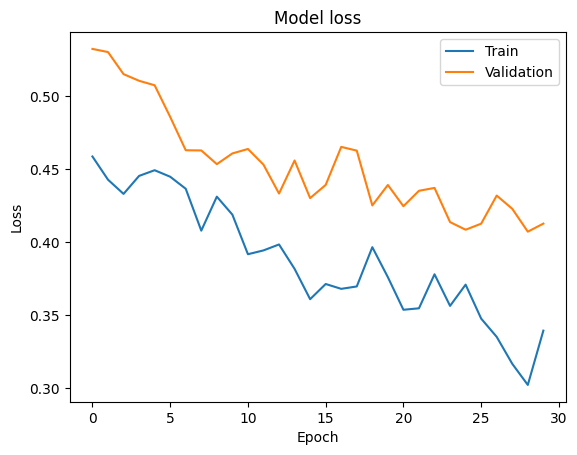

In [ ]:
# plot the result - plot the model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

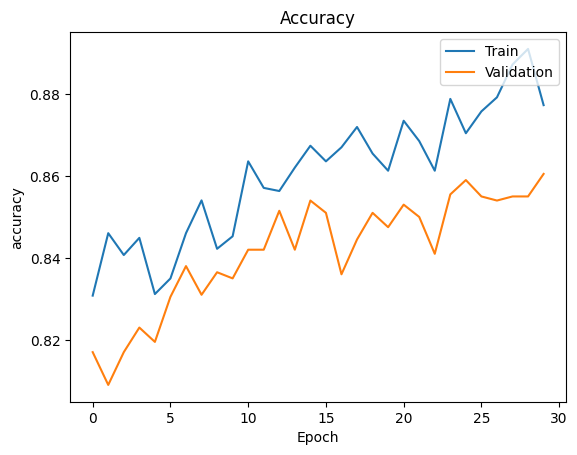

In [ ]:
# plot the model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Menyimpan model dalam format SavedModel
tf.saved_model.save(model, dir_base)

# Convert SavedModel menjadi vegs.tflite
converter = tf.lite.TFLiteConverter.from_saved_model(dir_base)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('vegs.tflite')
tflite_model_file.write_bytes(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Admin\Documents\IDCamp\fruit-classification\assets


INFO:tensorflow:Assets written to: C:\Users\Admin\Documents\IDCamp\fruit-classification\assets


10185292